##### This script contains basic examples in case you need a refresher on syntax.  There are also some modular functions (like importData) that can be simply copied into your project.  See comments below for further details.

In [2]:
# EX1. Loading a file into pandas

import os
import pandas as pd

# FUNCTION: 
#     Find file and load into pandas dataframe. Return "False" path if file not found.
# INPUTS:
#     path - Full file path
#     name - Filename to find (filename to find must end with this string)
#     headerRows - Number of header rows in data file
# OUPUTS:
#     .path - Full file path
#     .name - File name
#     .df - Pandas dataframe
class importData(object):
    
    # Execute function
    def __init__(self, path, name, headerRows):
        self.loadData(path, name, headerRows)
    
    # FUNCTION: Find file in directory
    # OUTPUTS: Returns file path and item name, or false if not found
    # NOTE: Notifies if multiple files were found, but only returns the last found
    def findFile(self, path, name):
        fileFound = False
        count = 0 
        
        # Search through folder for the file. Returns path as false if file wasn't found
        for item in os.listdir(path):
            if item.endswith(name):
                self.path = os.path.join(path, item)  # full file path
                self.name = item                      # just the file name
                fileFound = True
                count += 1
        if fileFound != True:
            self.path = False 
        
        # Tell user if multiple files were found. Last file found is used
        if count > 1:
            print ("%d files found with the same name! Using %s" %(count, self.name))

    # FUNCTION: Load file into pandas dataframe
    # OUTPUT: Returns dataframe
    def loadData(self, path, name, headerRows):
        self.findFile(path, name)
        if self.path != False:
            self.df = pd.read_csv(self.path, header=headerRows)
            print ("File loaded: %s" %(self.name))
        else:
            print ("**File not found: %s" %(name))

if __name__ == '__main__':
    
    fname = "TZOA_Log_File_0.txt"
    folder = "foo"
    path = "E:\Google Drive\MistyWest\Clad\[CL03] TZOA Technology IDD\Calibration Tests"
    fpath = os.path.join(path, folder)
    
    test = importData(fpath, fname, headerRows=0)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\Google Drive\\MistyWest\\Clad\\[CL03] TZOA Technology IDD\\Calibration Tests\\foo'

Populating the interactive namespace from numpy and matplotlib


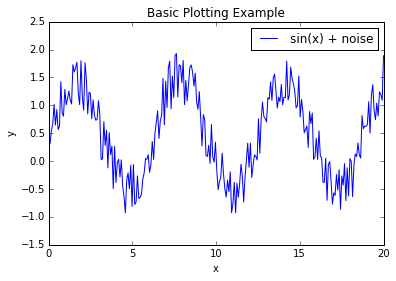

In [17]:
# EX2a. Basic plotting

import matplotlib.pyplot as plt
import numpy as np

"""
Note: May need to restart kernel to switch between the two plot outputs
  "inline" toggles inline plots
  "qt" toggles interactive plot window
"""
%pylab inline  
# %pylab qt  

x1 = np.linspace(0,20,250)
y1 = np.sin(x1) + np.random.random_sample(len(x1))  # create signal with noise

f1, axh = plt.subplots(1)  # create figure (can also make matrix, change fig size, etc.)

axh.plot(x1, y1, label="sin(x) + noise")
axh.set_title("Basic Plotting Example")
axh.set_xlabel("x")
axh.set_ylabel("y")
axh.legend()

axh.set_xlim([0,20])
axh.set_ylim([-1.5,2.5])

Populating the interactive namespace from numpy and matplotlib


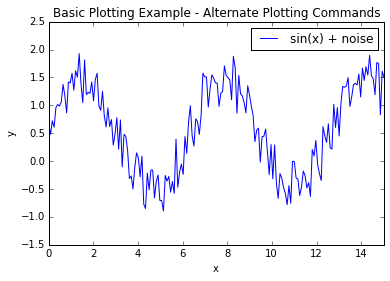

In [14]:
# EX2b. Basic plotting - Alternate plotting commands

import matplotlib.pyplot as plt
import numpy as np

%pylab inline

x1 = np.linspace(0,20,250)
y1 = np.sin(x1) + np.random.random_sample(len(x1))  # create signal with noise

# Less explicit commmands ("plt" vs using specific axis handle), but it's good enough for single plots
plt.plot(x1,y1,label="sin(x) + noise")

plt.title("Basic Plotting Example - Alternate Plotting Commands")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.xlim([0,15])
plt.ylim([-1.5,2.5])

Populating the interactive namespace from numpy and matplotlib


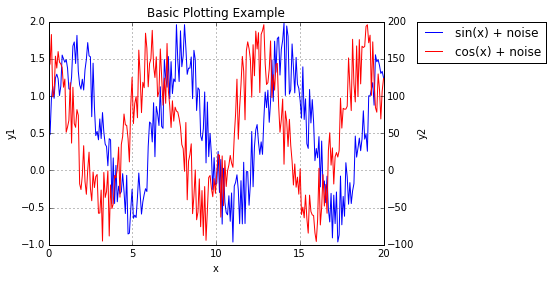

In [33]:
# EX2c. Plotting on secondary axis

import matplotlib.pyplot as plt
import numpy as np

%pylab inline

f1, axh = plt.subplots(1)
axh2 = axh.twinx()

x1 = np.linspace(0,20,250)
y1 = np.sin(x1) + np.random.random_sample(len(x1))
y2 = 100*(np.cos(x1) + np.random.random_sample(len(x1)))

ln1 = axh.plot(x1, y1, label="sin(x) + noise")
ln2 = axh2.plot(x1, y2, label="cos(x) + noise", color='r')

# Do this to put both labels in the same legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
axh.legend(lns, labs, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
    
axh.set_title("Basic Plotting Example")
axh.set_xlabel("x")
axh.set_ylabel("y1")
axh2.set_ylabel("y2")

axh.grid(True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


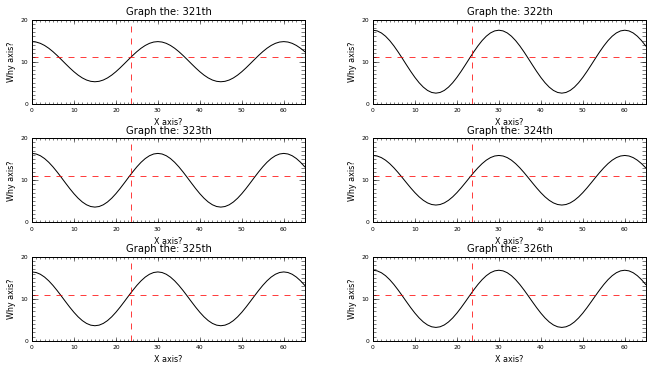

In [16]:
# EX2d. More plotting stuff

import pandas as pd  # Pandas dataframes very cool for data analysis stuff
import numpy as np  # Numpy is math functionality 

import pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import time, csv, os

%pylab inline  

# Make a fig / variable for subplots
r = np.arange(6) + 321
fig = plt.figure(figsize=(11,8.5))

for i in r:
    # Something to plot
    x = np.arange(66)
    y = 4*(np.random.random()+1)*np.cos(np.pi*x*24/360) + 10

    # Create something to act on and plot it
    ax = fig.add_subplot(i, autoscale_on=True)
    ax.plot(x,y,'k')

    # Scale the axis of the thing you plotted
    ax.axis('scaled')
    ax.axis([0,65, 0,20])

    #Set up some labels
    ax.set_xlabel('X axis?', size=8)
    ax.set_ylabel('Why axis?', size=8)
    title='Graph the: ' + str(i) + 'th'
    ax.set_title(title, size=10)

    #Locate a single point with 2 lines
    ax.axhline(y=11, color='r', linestyle='--', linewidth=0.75)
    ax.axvline(x=23.5, color='r', linestyle='--', linewidth=0.75)
    
    #Set the tick distribution for x and y
    ax.xaxis.set_major_locator(tkr.MaxNLocator(7))
    ax.xaxis.set_minor_locator(tkr.MaxNLocator(65))
    ax.yaxis.set_major_locator(tkr.MaxNLocator(2))
    ax.yaxis.set_minor_locator(tkr.MaxNLocator(20))

    #Set X tick attributes
    for xticka in ax.xaxis.get_major_ticks():
        xticka.tick2line.set_markersize(4)
        xticka.tick1line.set_markersize(4)
        xticka.label1.set_fontsize(6)
    
    for xticki in ax.xaxis.get_minor_ticks():
        xticki.tick2line.set_markersize(2)
        xticki.tick1line.set_markersize(2)

    #Set Y tick attributes
    for yticka in ax.yaxis.get_major_ticks():
        yticka.tick2line.set_markersize(6)
        yticka.tick1line.set_markersize(6)
        yticka.label1.set_fontsize(6)
    
    for yticki in ax.yaxis.get_minor_ticks():
        yticki.tick2line.set_markersize(4)
        yticki.tick1line.set_markersize(3)

# Save as png
#pl.savefig('plotter2', dpi=250, papertype='letter', orientation='landscape')
        
#adjustments to make sure text is readable
plt.subplots_adjust(wspace=0.25, hspace=-0.5)
plt.show()

In [27]:
# EX3. If statement

a = 9

if a <= 0:
    str1 = "less than 0."
elif a >= 10:
    str1 = "greater than 10."
else:
    str1 = "between 0 and 10."
    
str2 = "The number %d is " %a  + str1

print str2

The number 9 is between 0 and 10.


In [53]:
# EX4. For loops and error catching

print """Let's try deleting variables and see how to handle exceptions!

If the current divided number is less than 1, then it will be deleted and it won't be able be able to print.
Use "try/except" to catch the error and keep going!

---START---
"""

for i in range(3):
    print "Trial #%d" %i
    
    testNum = i/2.
    
    # Delete variable if less than 1
    if testNum < 1:
        del testNum
        
    try:
        print "-> All good since it's %.1f.\n" %testNum
    except:
        print "-> Variable gone!\n"

Let's try deleting variables and see how to handle exceptions!

If the current divided number is less than 1, then it will be deleted and it won't be able be able to print.
Use "try/except" to catch the error and keep going!

---START---

Trial #0
-> Variable gone!

Trial #1
-> Variable gone!

Trial #2
-> All good since it's 1.0.

